<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/Numerical_Optimizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Assignment 2:  Optimization Algorithms

## Learning Objectives

At the end of the experiment, you will be able to

* understand optimization, and differentiate between convex and non-convex optimization
* understand unconstrained and constrained optimizations
* understand gradient descent methods

## Information

### Optimization

Optimization is a complex process of sequential and iterative procedures that can make a system work at its best effectiveness.
The system could be Physical or Software based. Some common examples are Motor vehicle traction control system, a Fighter aircraft and its missile system, a Business model, Economic and budget planning system, Human resource Management, Traffic monitoring network, Internet routing devices. The list is practically endless. Optimization is an important tool in decision science and in the analysis of physical systems.


Optimization deals with an Objective, a quantitative measure of the performance of the system under study.
Unconstrained Optimization does not set limits or constraints on the ojective function whereas Constrained Optimization has constraints.

We must first identify an objective which depend on system variables that affect it.
Our goal is to find values of the variables that optimize the objective.

Based on the problem domain, this objective could be profit, time, potential energy, or any quantity or combination of quantities that can be represented by a single number.
The following figure explaines the relationship between Learning Rate and the Loss function
![img](https://miro.medium.com/max/700/1*rcmvCjQvsxrJi8Y4HpGcCw.png)

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_Assignment_02_Numerical_Optimizations_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.extras.talentsprint.com/ADSMI/Datasets/SIMPLEPENDULUMOSCILLATIONDATA.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://adsmi.iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Please complete Id and Password cells before running setup


### Import required packages

In [4]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import scipy
from scipy import optimize as opt                                       
from scipy.optimize import minimize, fsolve, LinearConstraint  
from scipy.linalg import solve 

### Convex univariate function optimization

A convex function is a continuous function whose value at the midpoint of every interval in its domain does not exceed the arithmetic mean of its values at the ends of the interval.

![img](https://mathworld.wolfram.com/images/eps-gif/ConvexFunction_1000.gif)

In this case, we will use a simple offset version of the $x^2$ function e.g. a simple parabola (u-shape) function. It is a minimization objective function with an optima at -5.0.

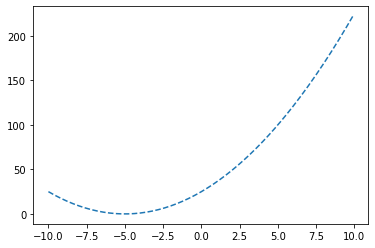

In [5]:
# objective function
def objective(x):
    return (5.0 + x)**2.0

# We can plot a coarse grid of this function with input values from -10 to 10 to get an idea of the shape of the target function.

# define range
r_min, r_max = -10.0, 10.0
# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)
# compute targets
targets = [objective(x) for x in inputs]
# plot inputs vs target
plt.plot(inputs, targets, '--')
plt.show()

Note: in a real optimization problem, we would not be able to perform so many evaluations of the objective function so easily. This simple function is used for demonstration purposes so we can learn how to use the optimization algorithm.

Next, we can use the optimization algorithm to find the optima.
Once optimized, we can summarize the result, including the input and evaluation of the optima and the number of function evaluations required to locate the optima

Optimal Input x: -5.000000
Optimal Output f(x): 0.000000
Total Evaluations n: 10


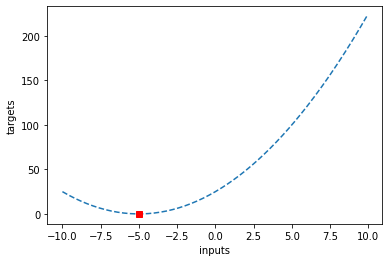

In [6]:
from scipy.optimize import minimize_scalar

result = minimize_scalar(objective)

# summarize the result
opt_x, opt_y = result['x'], result['fun']
print('Optimal Input x: %.6f' % opt_x)
print('Optimal Output f(x): %.6f' % opt_y)
print('Total Evaluations n: %d' % result['nfev'])

# Finally, we can plot the function again and mark the optima to confirm it was located in the place we expected for this function.

# define the range
r_min, r_max = -10.0, 10.0
# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)
# compute targets
targets = [objective(x) for x in inputs]
# plot inputs vs target
plt.plot(inputs, targets, '--')
plt.xlabel("inputs")
plt.ylabel("targets")
# plot the optima
plt.plot([opt_x], [opt_y], 's', color='r')
# show the plot
plt.show()

### Non-convex univariate function optimization

A Non-convex function is one that does not resemble a basin, meaning that it may have more than one hill or valley.

This can make it more challenging to locate the global optima as the multiple hills and valleys can cause the search to get stuck and report a false or local optima instead.

We can define a non-convex univariate function as follows. 

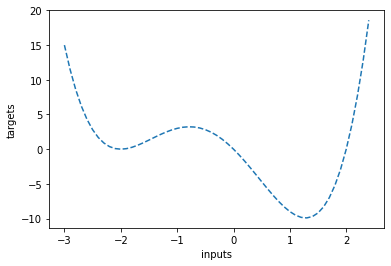

In [7]:
# objective function
def objective(x):
    return (x - 2.0) * x * (x + 2.0)**2.0

# We can sample above function and create a line plot of input values to objective values.

# plot a non-convex univariate function 
# define range
r_min, r_max = -3.0, 2.5
# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)
# compute targets
targets = [objective(x) for x in inputs]
# plot inputs vs target
plt.plot(inputs, targets, '--')
plt.xlabel("inputs")
plt.ylabel("targets")
plt.show()

Optimal Input x: 1.280776
Optimal Output f(x): -9.914950
Total Evaluations n: 15


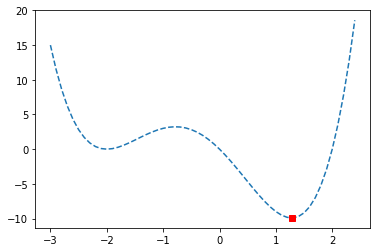

In [8]:
# Now let's summarize the result

# minimize the function
result = minimize_scalar(objective, method='brent')
# summarize the result
opt_x, opt_y = result['x'], result['fun']
print('Optimal Input x: %.6f' % opt_x)
print('Optimal Output f(x): %.6f' % opt_y)
print('Total Evaluations n: %d' % result['nfev'])

# plot the optima on a line plot.
# define the range
r_min, r_max = -3.0, 2.5
# prepare inputs
inputs = np.arange(r_min, r_max, 0.1)
# compute targets
targets = [objective(x) for x in inputs]
# plot inputs vs target
plt.plot(inputs, targets, '--')
# plot the optima
plt.plot([opt_x], [opt_y], 's', color='r')
# show the plot
plt.show()

### Unconstrained multi variable optimization

Multivariate optimization with no constraints is known as unconstrained multivariate optimization.

For e.g. $min f(x̄)$ w.r.t $x̄$ where $x̄ ∈ R^n$

So, when you look at this optimization problem you typically write it in this above form where you say you are going to minimize $f(x̄)$, and this function is called the objective function. And the variable that you can use to minimize this function is called the decision variable is written as w.r.t $x̄$ here and you also say $x̄$ is continuous that is, it could take any value in the real number line.

The necessary and sufficient conditions for $x̄*$ to be the minimizer of the function $f(x̄*)$

We use the minimize() function for the performing minimization on the scalar function. [Rosenbrock function](https://www.sfu.ca/~ssurjano/rosen.html) is a popular test problem for optimization algorithms. Consider the problem of minimizing the Rosenbrock function of  variables:

$f(x)=  \sum_{i=1}^{N-1} 100(x_{i+1} - x_i^2)^2 + (1-x_i)^2$


The minimum value is 0. We can achieve this by setting x=1.  We can perform this process using [Nelder-Mead](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html) Simplex Algorithm in SciPy

In [9]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

# minimize routine is used with the Nelder-Mead simplex algorithm
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = opt.minimize(rosen, x0, method='nelder-mead',options={'xatol': 1e-8, 'disp': True})

res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


array([1., 1., 1., 1., 1.])

### Gradient descent

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.

#### Example: Gradient Descent in 2-D
We consider a simple problem, corresponding to the minimization of a 2-D quadratic form$$ f(x_1, x_2) = \frac{1}{2} { x_1^2 + \eta x_2^2 } ,$$where $\eta > 0$ controls the anisotropy, and hence the difficulty, of the problem.

Anisotropy parameter $\eta$.

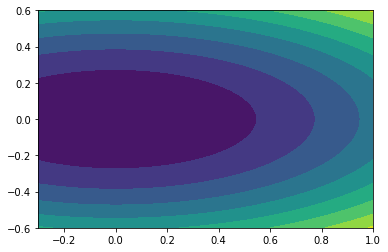

In [10]:
# Let's create a function f and visualize with a contour plot


eta = 4
f = lambda x : ( x[0]**2 + eta*x[1]**2 ) / 2

# generate background for the function
tx = np.linspace(-.3,1,101)
ty = np.linspace(-.6,.6,101)
[v,u] = np.meshgrid(ty,tx)
F = ( u ** 2 + eta * v ** 2 ) / 2
# visualize
plt.contourf(tx,ty,F.transpose(),10);

Calculate the gradient

The step size should satisfy $\tau_k < 2/\eta$. We use here a constant step size.

In [11]:
Gradf = lambda x : np.array([x[0],eta*x[1]])
tau = 1.6/eta
# Initial point for the descent.
x0 = np.array( [.9,.3] )

Perform the gradient descent using a fixed step size $\tau_k=\tau$. Display the decay of the energy $f(x^{(k)})$ through the iteration. Save the iterates so that X(:,k) corresponds to $x^{(k)}$.

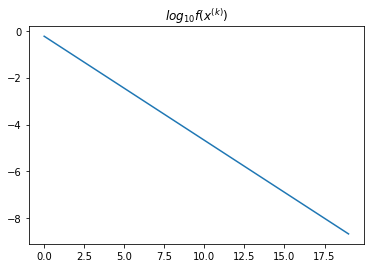

In [12]:
# iterate and perform gradient descent
x = x0
niter = 20
E = np.zeros((niter,1))
X = np.zeros((2,niter))
for i in np.arange(0,niter):
    X[:,i] = x
    E[i] = f(x)
    x = x - tau*Gradf(x) # NEW VALUE = OLD VALUE - COEFFICIENT. CORRECTION
#visualize
plt.plot(np.log10(E))
plt.title('$log_{10}f(x^{(k)})$')
plt.show()

Display the iterations using visualization

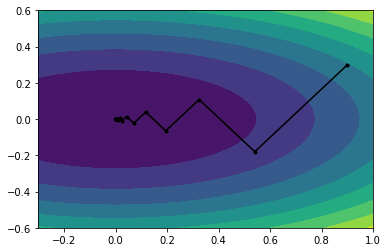

In [13]:
# visualize the countour plot
plt.contourf(tx,ty,F.transpose(),10);
plt.plot(X[0,:], X[1,:], 'k.-');

Visualization with different step sizes

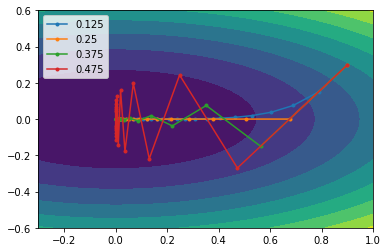

In [14]:
# with different step sizes
niter = 20
plt.contourf(tx,ty,F.transpose(),10)
tau_list = np.array([.5, 1, 1.5, 1.9]) / eta
for itau in np.arange(0,tau_list.size):
    tau = tau_list[itau]
    x = x0
    X = np.zeros((2,niter))
    for i in np.arange(0,niter):
        X[:,i] = x.flatten()
        x = x - tau*Gradf(x)
    plt.plot(X[0,:], X[1,:], '.-',label=tau)
plt.legend()
plt.show()

### Other Variants of Gradient Descent

### Batch Gradient Descent

Batch Gradient Descent is when we sum up over all examples on each iteration when performing the updates to the parameters. Therefore, for each update, we have to sum over all examples:

$$w = w - \alpha \triangledown_w J(w)$$

Example:

Here, we consider a simple pendulum oscillation dataset with two variables. The dataset consists of two columns and 89 rows. Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). The dataset describes the relationship between the l and t which is $L∝T^2$ .

In [23]:
# Load the data by using pandas read_csv()
data = pd.read_csv("/content/SIMPLEPENDULUMOSCILLATIONDATA.csv")

# Get the length and time period values from the dataset
l = data['l'].values
t = data['t'].values
# Get the square of time period
tsq = t * t

The below function `train()` updates the values of m and c and calculates error. The loss is minimized due to the changed values of m and c. The new values m, c and the minimized error is returned.

In [24]:
# function to update m and c
def train(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

Let us vary LR and find how the error decreases in each case, and how the final line looks, by training each case for the same number of iterations - 2000.

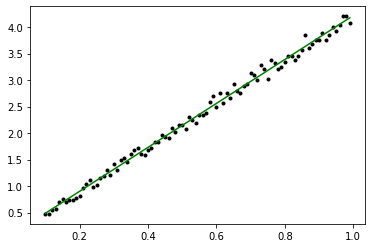

In [25]:
# Save errors
errs_1 = []
m, c = 0, 0
eta = 0.1
# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.1.
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta)
    errs_1.append(error)

# Save final line
m_1, c_1 = m, c


# Visualize the function
# Find the lines
y_1 = m_1 * l + c_1
plt.plot(l, tsq, '.k');
plt.plot(l, y_1, "g");

### Stochastic gradient descent:

Instead of going through all examples, Stochastic Gradient Descent (SGD) performs the parameters update on each example $(x_i,y_i)$. 

Here, learning happens on every example:
$$w = w - \alpha \triangledown_w J(x_i,y_i;w)$$

given the equation $y_i = mx_i + c$

we calculate the error as $E$ = $(y - y_i)^2$ ; where $y$ is the ground truth and $y_i$ is the prediction

Finding the rate of change in error with respect to m is $\frac{\partial E_i }{\partial m}$ = $ -2(y_i - (mx_i + c)) * x_i$

rate of change in c is $\frac{\partial E_i }{\partial c}$ = $ -2(y_i - (mx_i + c))$

And then we update the slope and bias with change in slope $\Delta m$ and change in bias $\Delta c$ with learning rate $eta$

$m$  = $m - \Delta m * eta$

$c$  = $c - \Delta c * eta$

The below function `next_step()` updates the values of m and c and calculates error. The loss is minimized due to the changed values of m and c. The new values m, c and the minimized loss is returned.

In [26]:
# change in m and c
def next_step(x, y, m, c, eta):
    ycalc = m * x + c
    error = (y - ycalc) ** 2
    delta_m = -(y - ycalc) * x
    delta_c = -(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    return m, c, error

The function below takes a random data point at a time and udpates m and c using the function `next_step()`

In [27]:
# update m and c for one data point
def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e

The function below trains the data for 1000 iterations. In each iteration it calls the `one_loop_random()` function.

In [28]:
# train for 1000 iterations
def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(x, y, m, c, eta)
    return m, c, err

In [29]:
# Init m, c
m, c = 0, 0
# Learning rate
lr = 0.001

plot Errors vs Iterations

m = 2.20137 c = 1.18832 Error = 0.822474
m = 2.92007 c = 0.775867 Error = 0.000694133
m = 3.37229 c = 0.515919 Error = 0.0825637
m = 3.65704 c = 0.352466 Error = 0.00591654
m = 3.83623 c = 0.249481 Error = 0.00437744
m = 3.94904 c = 0.184683 Error = 0.00149706
m = 4.02004 c = 0.143883 Error = 0.0303197
m = 4.06473 c = 0.118209 Error = 0.00610222
m = 4.09285 c = 0.101998 Error = 0.0484594
m = 4.11056 c = 0.0918442 Error = 0.00354973


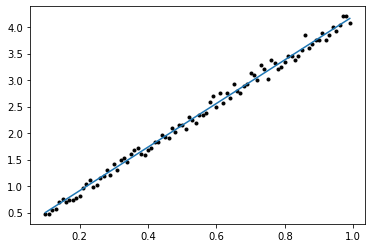

In [30]:
# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
plt.plot(l, tsq, '.k')
plt.plot(l, y)
plt.show()

**Ungraded Exercise:** Experiment with other lr values.

In [31]:
# YOUR CODE HERE

### Constrained Optimization

Optimization with constrains on the objective.

Example: Optimizing Number of shares in Stock Markets

In [32]:
# set variables to determine the number of buyers in the market and 
# the number of shares you want to sell
n_buyers = 10
n_shares = 15

# Next, create arrays to store the price that each buyer pays, the maximum amount they can afford to spend, and the maximum number of shares each buyer can afford, given the first two arrays.
np.random.seed(10)

# Generating the array of prices the buyers will pay
# np.random.random() creates an array of random numbers
# on the half-open interval [0,1)
prices = np.random.random(n_buyers)

# generate an array of integers on the half-open interval from [1, 4), 
# again with the size of the number of buyers
money_available = np.random.randint(1, 4, n_buyers)

#### Compute the maximum number of shares each buyer can purchase

In [33]:
# take the ratio of the money_available with prices to determine the maximum number of shares each buyer can purchase
n_shares_per_buyer = money_available / prices

# print each of these arrays separated by a newline
print(prices, money_available, n_shares_per_buyer, sep="\n")

[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
 0.19806286 0.76053071 0.16911084 0.08833981]
[1 1 1 3 1 3 3 2 1 1]
[ 1.29647768 48.18824404  1.57816269  4.00638948  2.00598984 13.34539487
 15.14670609  2.62974258  5.91328161 11.3199242 ]


In [34]:
# create an array of ones with the length `n_buyers` and pass it as the first argument to `LinearConstraint`
constraint = LinearConstraint(np.ones(n_buyers), lb=n_shares, ub=n_shares)

Since `LinearConstraint` takes the dot product of the solution vector with this argument, it’ll result in the sum of the purchased shares.

This result is then constrained to lie between the other two arguments:

1. The lower bound lb
2. The upper bound ub

Next, create the bounds for the solution variable. The bounds limit the number of shares purchased to be 0 on the lower side and `n_shares_per_buyer` on the upper side. The format that `minimize()` expects for the bounds is a sequence of tuples of lower and upper bounds:

In [35]:
# use a comprehension to generate a list of tuples for each buyer
bounds = [(0, n) for n in n_shares_per_buyer]

#define the objective function
def objective_function(x, prices):
    return -x.dot(prices)

In above cell, you define `objective_function()` to take two arguments. Then you take the dot product of x with prices and return the negative of that value. Remember that you have to return the negative because you’re trying to make that number as small as possible, or as close to negative infinity as possible. Finally, you can call `minimize()`:

In [36]:
res = minimize(
    objective_function,
    x0=10 * np.random.random(n_buyers),
    args=(prices,),
    constraints=constraint,
    bounds=bounds,
)

print(res)

     fun: -8.783020157087615
     jac: array([-0.7713207 , -0.02075195, -0.63364828, -0.74880385, -0.49850702,
       -0.22479653, -0.19806278, -0.76053071, -0.16911077, -0.08833981])
 message: 'Optimization terminated successfully'
    nfev: 187
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([1.29647768e+00, 1.07635367e-13, 1.57816269e+00, 4.00638948e+00,
       2.00598984e+00, 3.48323773e+00, 3.99680289e-15, 2.62974258e+00,
       1.94817649e-14, 2.79247930e-14])


In this code, res is an instance of OptimizeResult, just like with `minimize_scalar()`. As you’ll see, there are many of the same fields, even though the problem is quite different. In the call to `minimize()`, you pass five arguments:

1. objective_function
2. $x_0$
3. args
4. constraints
5. bounds

Once the solver runs, you should inspect `res` by printing it:

### Please answer the questions below to complete the experiment:




**Question:** Determine the gradient of the function $ f(x,y) = x^2 -2y^2 -4y + 6$ at the point (0, 0). $\nabla f = [\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}]$

**Options:**
- a) $\nabla f = [0, 0]$
- b) $\nabla f = [0, -4]$
- c) $\nabla f = [-2, 4]$
- d) $\nabla f = [4, -2]$

In [37]:
# @title Please select the correct option below { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "a", "b","c","d"]

In [38]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [39]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [40]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [41]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [42]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [43]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please complete the setup first.
